In [1]:
import ads
import numpy as np
import matplotlib.pyplot as plt
import ads_query_pkg as aqp

In [19]:
UD_cite_total, t = aqp.cite_count('ultra diffuse galaxies', 'title')
DM_cite_total, t2 = aqp.cite_count('dark matter', 'title')

UD_read_total, t3 = aqp.read_count('ultra diffuse galaxies', 'title')
DM_read_total, t4 = aqp.read_count('dark matter', 'title')

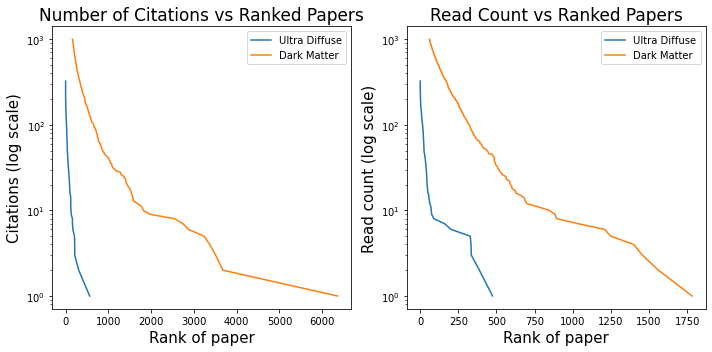

In [49]:
scale = 1

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].set_title('Number of Citations vs Ranked Papers', size=17)

ax[0].plot(t, UD_cite_total, label='Ultra Diffuse')
ax[0].plot(t2, DM_cite_total/scale, label='Dark Matter')

ax[0].set_xlabel('Rank of paper', size=15)
ax[0].set_ylabel('Citations (log scale)', size=15)
ax[0].set_yscale('log')


ax[1].set_title('Read Count vs Ranked Papers', size=17)
ax[1].plot(t3, UD_read_total, label='Ultra Diffuse')
ax[1].plot(t4, DM_read_total/scale, label='Dark Matter')

ax[1].set_xlabel('Rank of paper', size=15)
ax[1].set_ylabel('Read count (log scale)', size=15)
ax[1].set_yscale('log')

ax[0].legend()
ax[1].legend()
plt.tight_layout()

plt.savefig('citeAndRead.pdf')

plt.show()

In [52]:
UD, titles = aqp.top_cite(('ultra diffuse galaxies'), 1960, 2030, 'title')
DM, titles2 = aqp.top_cite(('dark matter'), 1960, 2030, 'title')

print(UD, titles)


[   0.  206.   89. 1423.  516. 3782.] ['1960-1970', '1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020']


In [51]:
print(DM)

[   3.   69. 1058. 2000. 2000. 2000.]


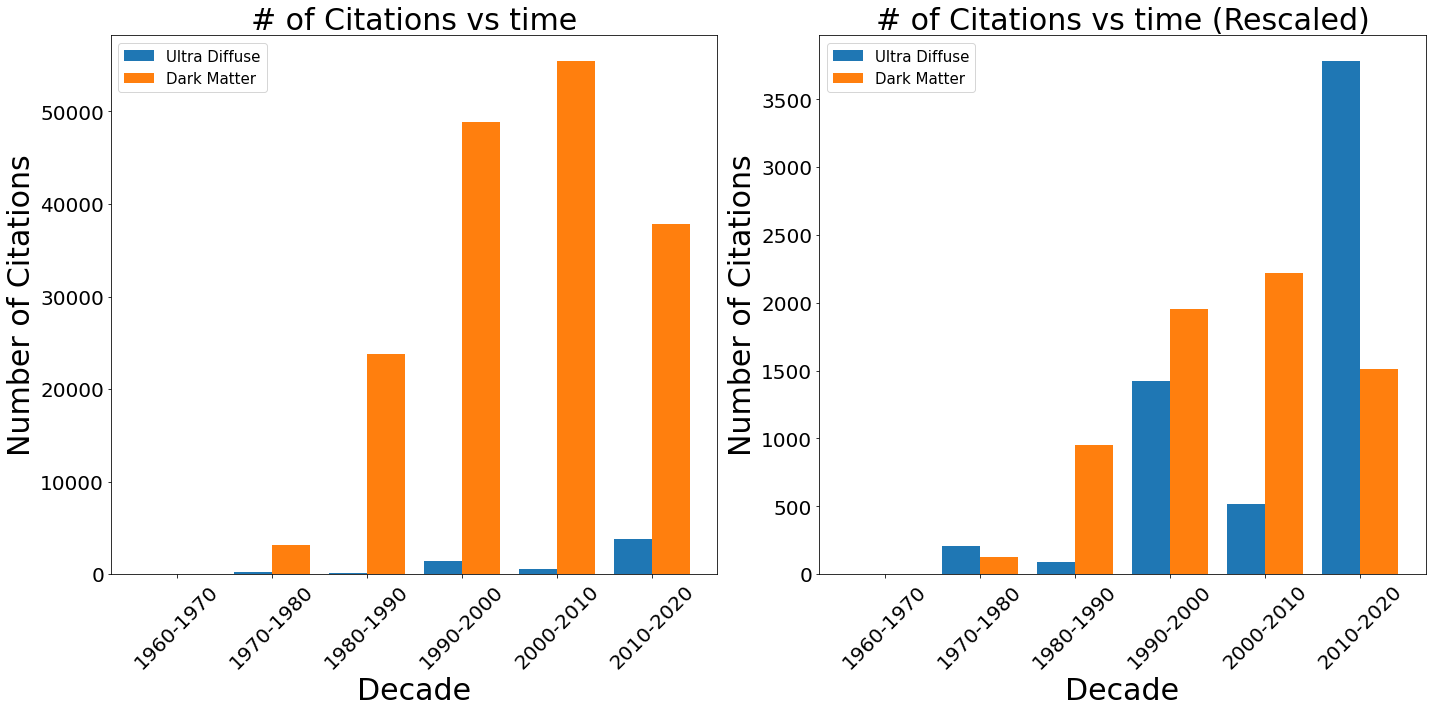

In [65]:
scale = 25
width = 0.4
title_size = 30
axis_size = 30

fig, ax = plt.subplots(1,2, figsize=(20,10))

x = np.arange(len(titles))

ax[0].set_title('# of Citations vs time', size=title_size)

ax[0].bar(x - width/2, UD, width, label='Ultra Diffuse')
ax[0].bar(x + width/2, DM, width, label='Dark Matter')

ax[0].set_xlabel('Decade', size=axis_size)
ax[0].set_ylabel('Number of Citations', size=axis_size)

ax[0].tick_params(axis='y', labelsize=20)
ax[0].set_xticks(x)
ax[0].set_xticklabels(titles, rotation=45, size=20)
ax[0].legend(prop={'size':axis_size/2})



ax[1].set_title('# of Citations vs time (Rescaled)', size=title_size)

ax[1].bar(x - width/2, UD, width, label='Ultra Diffuse')
ax[1].bar(x + width/2, DM/scale, width, label='Dark Matter')
ax[1].tick_params(axis='y', labelsize=20)
ax[1].set_xlabel('Decade', size=axis_size)
ax[1].set_ylabel('Number of Citations', size=axis_size)

ax[1].set_xticks(x)
ax[1].set_xticklabels(titles, rotation=45, size=20)
ax[1].legend(prop={'size':axis_size/2})



plt.tight_layout()

plt.savefig('comparison.pdf')

plt.show()